# What is the most optimal skills to learn for Data Analysts?

## Methodology

1. Group skills to determine median salary and likelihood of being in posting.
2. Visualize median salary vs percent skill demand.
3. (Optional) Determine if certain technologies are more prevalent.

In [1]:
# Importing libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

1. Group skills to determine median salary and likelihood of being in posting.

In [2]:
df_DA_MY = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Malaysia')].copy()

df_DA_MY = df_DA_MY.dropna(subset=['salary_year_avg'])

df_DA_MY_exploded = df_DA_MY.explode('job_skills')

df_DA_MY_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
7931,51014.0,python
7931,51014.0,r
7931,51014.0,sql
7931,51014.0,tableau
21523,111175.0,tableau


In [8]:
df_DA_skills = df_DA_MY_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_MY)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 10

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
excel,5,111175.0,45.454545
sql,5,79200.0,45.454545
tableau,5,79200.0,45.454545
python,5,64800.0,45.454545
looker,3,79200.0,27.272727
r,2,57907.0,18.181818
flow,2,87987.5,18.181818


2. Visualize median salary vs percent skill demand.
3. Determine if certain technologies are more prevalent.

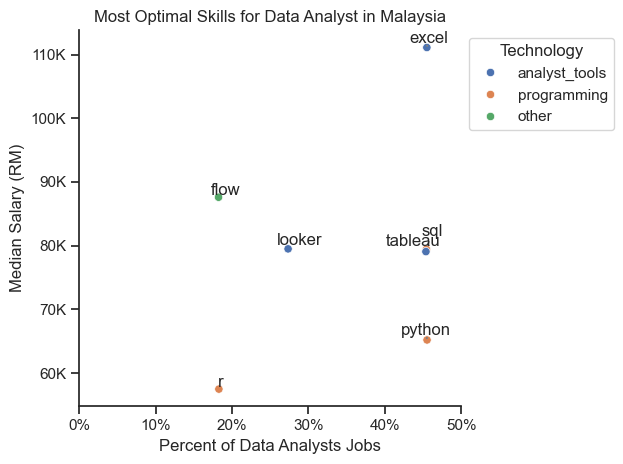

In [55]:
from adjustText import adjust_text

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style="ticks")

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray'))

# Set axis, labels and legend
plt.title('Most Optimal Skills for Data Analyst in Malaysia')
plt.xlabel('Percent of Data Analysts Jobs')
plt.ylabel('Median Salary (RM)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.set_xlim(0, 50)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [36]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict={}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing key
            technology_dict[key] += value
        else:                      # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['qlik',
  'powerbi',
  'ms access',
  'sas',
  'esquisse',
  'power bi',
  'spreadsheet',
  'spss',
  'microstrategy',
  'tableau',
  'word',
  'splunk',
  'sap',
  'powerpoint',
  'ssrs',
  'outlook',
  'msaccess',
  'dax',
  'sheets',
  'cognos',
  'alteryx',
  'datarobot',
  'ssis',
  'excel',
  'sharepoint',
  'nuix',
  'visio',
  'looker'],
 'programming': ['html',
  'lua',
  'sas',
  'cobol',
  'javascript',
  'c',
  'apl',
  'css',
  'java',
  'rust',
  'groovy',
  'vb.net',
  'solidity',
  'sass',
  'ruby',
  'haskell',
  'julia',
  'mongodb',
  'crystal',
  'vba',
  'elixir',
  'go',
  'pascal',
  'nosql',
  'f#',
  'c++',
  'scala',
  'clojure',
  'kotlin',
  'dart',
  'php',
  'powershell',
  't-sql',
  'perl',
  'typescript',
  'swift',
  'mongo',
  'ocaml',
  'python',
  'sql',
  'objective-c',
  'matlab',
  'erlang',
  'assembly',
  'visualbasic',
  'shell',
  'c#',
  'bash',
  'golang',
  'no-sql',
  'lisp',
  'visual basic',
  'r',
  'fortran',
  'del

In [39]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,qlik
0,analyst_tools,powerbi
0,analyst_tools,ms access
0,analyst_tools,sas
0,analyst_tools,esquisse
...,...,...
9,sync,unify
9,sync,symphony
9,sync,microsoft teams
9,sync,slack


In [41]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')